In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
tpi_10 = np.genfromtxt("tpi_10.csv" , delimiter= ",")
#tpi_30 = np.genfromtxt("tpi_30.csv" , delimiter= ",")
#tpi_50 = np.genfromtxt("tpi_50.csv" , delimiter= ",")
#tpi_100 = np.genfromtxt("tpi_100.csv" , delimiter= ",")
#tpi_300 = np.genfromtxt("tpi_300.csv" , delimiter= ",")
tpi_500 = np.genfromtxt("tpi_500.csv" , delimiter= ",")
slope =  np.genfromtxt("slope.csv" , delimiter= ",")
#aspect = np.genfromtxt("aspect.csv" , delimiter= ",")
#tpi_array_lst = [ tpi_10, tpi_30, tpi_50, tpi_100, tpi_300, tpi_500]

In [57]:
#def LF_TPI(big_TPI_array ,small_TPI_array ,slope_array_deg )
big_TPI_array = tpi_500
small_TPI_array = tpi_10
slope_array_deg  = slope
std = big_TPI_array.std()
lf300x100 = np.zeros(big_TPI_array.shape , dtype=np.uint8)

In [223]:
#switch = True
breaker = 0
switch = True
while switch is True:
    shape1 = np.array((big_TPI_array.shape[0]-breaker,big_TPI_array.shape[1]-breaker))
    
    shape2 = np.array((big_TPI_array.shape[0],big_TPI_array.shape[1]-breaker))
    shape3 = np.array((big_TPI_array.shape[0]-breaker,big_TPI_array.shape[1]))
    
    shape4 = np.array((big_TPI_array.shape[0]-(breaker + 1),big_TPI_array.shape[1]-breaker))
    shape5 = np.array((big_TPI_array.shape[0]-breaker,big_TPI_array.shape[1]-(breaker + 1)))
    shape_lst = [shape1, shape2, shape3, shape4, shape5]
        
    gcd_lst =[np.gcd(i[0],i[1]) for i in shape_lst]
    gcd_lst.sort()
    for index , gcd in enumerate(gcd_lst):
        if (max(shape_lst[index]/gcd) < 256) & all([(i).is_integer() for i in (shape_lst[index]/gcd)]):
            new_shape  = shape_lst[index]
            switch = False
            break
    breaker += 1


resezed_array = lf300x100[:new_shape[0] , :new_shape[1]]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254


array([233., 111.])

In [229]:
resezed_arraycd

NameError: name 'resezed_arraycd' is not defined

In [194]:
new_shape

array([-38028, -40957])

In [192]:
max(shape_lst[index]/gcd) < 500

True

In [190]:
gcd

1

In [184]:
x = [np.gcd(i[0],i[1]) for i in shape_lst]
x.sort()
x

[1, 1, 1, 1, 2]

In [170]:
np.array(new_shape)/12



array([487., 243.])

In [158]:
while len(tpilis)t >1:
    run tpi at value with buffer around bloks of size value
    
        export  geometrys from blocks to labeled geoseries
        unary unify label geoseries
        explode unary union
        save resulting geometrys with unique id to geodataframe along with tpi valuee and label


array([487., 243.])

In [152]:

new_shape

(5844, 2916)

In [142]:
gcd_lst

[(5845, 2916), (5846, 2916), (5845, 2917), (5844, 2916), (5845, 2915)]

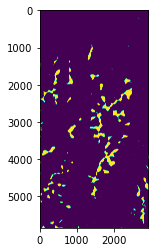

In [58]:
# LF = 7 | flat ridge tops | mesa tops
lf300x100[big_TPI_array >= 180] = 255
lf300x100[big_TPI_array < 180] = 0

plt.imshow(lf300x100)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 127, 127],
       [  0,   0,   0, ..., 127, 127, 127],
       [  0,   0,   0, ..., 127, 127, 127]], dtype=uint8)

In [36]:
from skimage import measure
contours = measure.find_contours(lf300x100 ,
    fully_connected='low',
    positive_orientation='low')
"""#contours = [ for contour in contours for point in contour]
ceil_contours = []
for contour in contours:
    contour = []
    for point in contour:
        contour.extend(np.ceil(point))
    ceil_contours.extend(contour)"""
        

'#contours = [ for contour in contours for point in contour]\nceil_contours = []\nfor contour in contours:\n    contour = []\n    for point in contour:\n        contour.extend(np.ceil(point))\n    ceil_contours.extend(contour)'

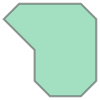

In [45]:
from shapely.geometry import Polygon
Polygon(contours[1])

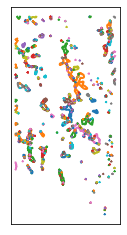

In [37]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
#ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [46]:
import cv2

In [82]:
contours, hierarchy = cv2.findContours(lf300x100.copy(), 
                                          cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
                                          offset=(0, 0))

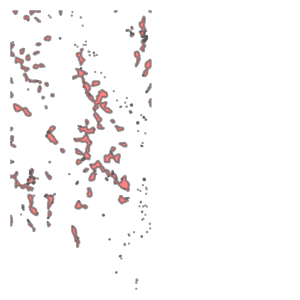

In [83]:
import numpy as np
from shapely.geometry import Polygon, MultiPolygon

contours = map(np.squeeze, contours)  # removing redundant dimensions
polygons = map(Polygon, contours) # converting to Polygons
multipolygon = MultiPolygon(polygons)  # putting it all together in a MultiPolygon


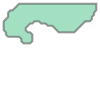

In [92]:
shapely.geometry.Polygon(np.squeeze(contours[0]))

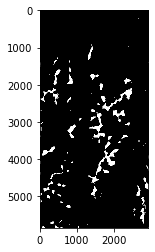

In [85]:


contours, hierarchy = cv2.findContours(lf300x100.copy(), 
                                          cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
                                          offset=(0, 0))

plt.subplot(122)
cv2.drawContours(lf300x100, contours, -1, (127, 127, 127), 2)
plt.imshow(lf300x100, cmap='Greys_r',  interpolation='none')
plt.show()

In [8]:
# LF = 5 | Broad Flat Areas | (slope = 0)
lf300x100[((small_TPI_array > -std) & (small_TPI_array < std)) & ((big_TPI_array > -std) & (big_TPI_array < std)) & (slope_array_deg <= 5)] = 5

# LF = 6 | Broad open slopes | (slope > 0)
lf300x100[((small_TPI_array > -std) & (small_TPI_array < std)) & ((big_TPI_array > -std) & (big_TPI_array < std)) & (slope_array_deg >= 6)] = 6

# LF = 7 | flat ridge tops | mesa tops
lf300x100[((small_TPI_array > -std) & (small_TPI_array < std)) & (big_TPI_array >= std)] = 7

# LF = 4 | U-shape valleys
lf300x100[((small_TPI_array > -std )& (small_TPI_array < std)) & (big_TPI_array <= -std)] = 4

# LF = 2 | Lateral midslope | incised drainages
lf300x100[(small_TPI_array <= -std) & ((big_TPI_array > -std )& (big_TPI_array < std))] = 2

# LF = 9 | Lateral midslope |drainage divides
lf300x100[(small_TPI_array >= std) & ((big_TPI_array > -std) & (big_TPI_array < std))] = 9

# LF = 3 | Upland incised |drainages |Stream headwaters
lf300x100[ (small_TPI_array <= -std) & (big_TPI_array >= std)] = 3

# LF = 1 | V-shape river valleys | Deep narrow canyons
lf300x100[(small_TPI_array <= -std) & (big_TPI_array <= -std)] = 1

# LF = 10 | mountain tops | High narrow ridges
lf300x100[(small_TPI_array >= std) & (big_TPI_array >= std)] = 10

# LF = 8 |Local ridge/hilltops within | broad valleys
lf300x100[(small_TPI_array >= std) & (big_TPI_array <= -std)] = 8

In [ ]:

def do_knn(seed):
    k_nn = [seed,
            [seed[0] , seed[1]+1] ,[seed[0] , seed[1]-1],
            [seed[0]+1 , seed[1]],[seed[0]-1 , seed[1]],
            [seed[0]+1 , seed[1]-1],[seed[0]-1 , seed[1]-1],
            [seed[0]+1 , seed[1]+1],[seed[0]-1 , seed[1]+1]]
    k_nn = list(map(set , k_nn))
    return k_nn

argwhere = np.argwhere(lf300x100 == 10)
argwhere = list(map(list , argwhere))

totzar = {}
while len(argwhere) > 0:
    seed = argwhere[0]
    
    k_nn = do_knn(seed)
    #potential problem
    cluster = [i for i in argwhere if set(i) in  k_nn]
    #potential problem
    argwhere = list(filter(lambda i:i not in cluster,argwhere))
    
    poly_label = "".join(random.choices(string.ascii_lowercase + string.digits , k= 30))
    out_dict = {poly_label : cluster}
    
    #potential problem( most likely)
    while len(cluster) > 0:
        querry_knn = list()
        
        for seed in cluster:
            querry_knn.extend(do_knn(seed))
        
        cluster = cluster = [i for i in argwhere if set(i) in  querry_knn]
        
        argwhere = list(filter(lambda i:i not in cluster,argwhere))
        
        out_dict[poly_label].extend(cluster)
    
    totzar.update(out_dict)
totzar

In [ ]:
class Primes():
    """
    class
    """
    math = __import__('math')
    def __init__(self,listLength = int):
        """
        func
        """
        assert type(listLength) is int , "please enter an integer to listLength"
        self.listLength = listLength
        
    def isPrime (self, primeList, candidate):
        """
        func
        """
        upperLimit = self.math.sqrt(candidate)
        for p in primeList:
            if candidate % p == 0:
                return False
            if p >= upperLimit:
                break

        return True

    def primeList(self):
        """
        func
        """
        if self.listLength < 1 :
            return []
        primes = [2]

        candidate = 3
        while self.listLength > len(primes):
            if self.isPrime(primes, candidate):
                primes.append(candidate)
            candidate +=2

        return primes
    
#def add_prime_labels(self, tpi_array_lst):
def add_prime_labels(tpi_array_lst,slope): 

    primes = Primes(listLength= int(4*(len(tpi_array_lst) +1)))
    primeList = primes.primeList()
    
    legend_dict = {"peak":{"heirarchy" : []}, "valley" : {"heirarchy" : []}, "slope" : {"heirarchy" : []} , "plane": {"heirarchy" : []}}
    
    std = tpi_array_lst[-1].std()
    lf_array = np.full(tpi_array_lst[-1].shape, 1)
    
    for index, tpi in enumerate(tpi_array_lst):
        print(f"index number {index} started")
        prime1, prime2, prime3, prime4 = primeList[index * 4:(index + 1)* 4]
        
        # add to legend dictionary 
        lf_array[tpi >= std] = lf_array[tpi > std] * prime4
        legend_dict["peak"]["heirarchy"].append(prime4)

        lf_array[tpi <= -std] = lf_array[tpi < -std] * prime1 
        legend_dict["valley"]["heirarchy"].append(prime1)

        lf_array[(tpi > -std) & (tpi < std ) & (slope >= 6)] = lf_array[(tpi > -std) & (tpi < std ) & (slope >= 6)] * prime2 
        legend_dict["slope"]["heirarchy"].append(prime2)

        lf_array[(tpi > -std) & (tpi < std ) & (slope <= 5)]= lf_array[(tpi > -std) & (tpi < std ) & (slope <= 5)] * prime3
        legend_dict["plane"]["heirarchy"].append(prime3)
      
        print(f"index number {index} complete")
    return lf_array ,legend_dict


In [ ]:
lf_array,legend_dict = add_prime_labels(tpi_array_lst,slope)
#np.savetxt("lf_array.csv" , lf_array , delimiter= ",")

In [ ]:
import string
import random

In [ ]:

def do_knn(seed):
    k_nn = [seed,
            [seed[0] , seed[1]+1] ,[seed[0] , seed[1]-1],
            [seed[0]+1 , seed[1]],[seed[0]-1 , seed[1]],
            [seed[0]+1 , seed[1]-1],[seed[0]-1 , seed[1]-1],
            [seed[0]+1 , seed[1]+1],[seed[0]-1 , seed[1]+1]]
    k_nn = list(map(set , k_nn))
    return k_nn

argwhere = np.argwhere(lf300x100 == 10)
argwhere = list(map(list , argwhere))

totzar = {}
while len(argwhere) > 0:
    seed = argwhere[0]
    
    k_nn = do_knn(seed)
    #potential problem
    cluster = [i for i in argwhere if set(i) in  k_nn]
    #potential problem
    argwhere = list(filter(lambda i:i not in cluster,argwhere))
    
    poly_label = "".join(random.choices(string.ascii_lowercase + string.digits , k= 30))
    out_dict = {poly_label : cluster}
    
    #potential problem( most likely)
    while len(cluster) > 0:
        querry_knn = list()
        
        for seed in cluster:
            querry_knn.extend(do_knn(seed))
        
        cluster = cluster = [i for i in argwhere if set(i) in  querry_knn]
        
        argwhere = list(filter(lambda i:i not in cluster,argwhere))
        
        out_dict[poly_label].extend(cluster)
    
    totzar.update(out_dict)
totzar

In [ ]:
argwhere = np.argwhere(lf300x100 == 8)
argwhere = list(map(set,argwhere))
#maybe switch to set of frozen sets!!!
#argwhere = set(map(frozenset,argwhere))

seed = list(argwhere[3])
def do_knn(seed):
    k_nn = [seed,
            [seed[0] , seed[1]+1] ,[seed[0] , seed[1]-1],
            [seed[0]+1 , seed[1]],[seed[0]-1 , seed[1]],
            [seed[0]+1 , seed[1]-1],[seed[0]-1 , seed[1]-1],
            [seed[0]+1 , seed[1]+1],[seed[0]-1 , seed[1]+1]]
    k_nn = list(map(set , k_nn))
    return k_nn
cluster = [i for i in argwhere if i in k_nn]
cluster

#psudo-code
"""label = {"LFID":cluster}

seed_lst = cluster.remove(set(seed))
#probably while loop
for seed in seed_lst:
    new_cluster = do_knn(seed)
    label + new_cluster
    seed_lst.append(new_cluster).remove(seed)

label = polygon"""

In [ ]:
cluster

In [ ]:
#argwhere = [set(i) for i in argwhere]



"""set_k_nn = [set(seed),
        set((seed[0] , seed[1]+1)) ,set((seed[0] , seed[1]-1)),
        set((seed[0]+1 , seed[1])),set((seed[0]-1 , seed[1])),
        set((seed[0]+1 , seed[1]-1)),set((seed[0]-1 , seed[1]-1)),
        set((seed[0]+1 , seed[1]+1)),set((seed[0]-1 , seed[1]+1))]
array_k_nn = [np.array(seed),
            np.array((seed[0] , seed[1]+1)) ,np.array((seed[0] , seed[1]-1)),
            np.array((seed[0]+1 , seed[1])),np.array((seed[0]-1 , seed[1])),
            np.array((seed[0]+1 , seed[1]-1)),np.array((seed[0]-1 , seed[1]-1)),
            np.array((seed[0]+1 , seed[1]+1)),np.array((seed[0]-1 , seed[1]+1))]"""

In [ ]:
"""argwhere = np.argwhere(lf300x100 == 8)
argwhere = list(map(set,argwhere))"""

In [ ]:
cluster = [i for i in argwhere if i in k_nn]

filetered_argwhere = list(filter(lambda i:i not in cluster,argwhere))



label = {"LFID":cluster}

seed_lst = cluster.remove(set(seed))
#probably while loop
for seed in seed_lst:
    new_cluster = do_knn(seed)
    label + new_cluster
    seed_lst.append(new_cluster).remove(seed)

label = polygon

new_seed = list(filetered_argwhere[0])
new_k_nn = [new_seed,
        [new_seed[0] , new_seed[1]+1] ,[new_seed[0] , new_seed[1]-1],
        [new_seed[0]+1 , new_seed[1]],[new_seed[0]-1 , new_seed[1]],
        [new_seed[0]+1 , new_seed[1]-1],[new_seed[0]-1 , new_seed[1]-1],
        [new_seed[0]+1 , new_seed[1]+1],[new_seed[0]-1 , new_seed[1]+1]]


new_k_nn = list(map(set , new_k_nn))

new_cluster = [i for i in filetered_argwhere if i in new_k_nn]
cluster = set(map(frozenset,cluster))
new_cluster = set(map(frozenset,new_cluster))
new_k_nn = set(map(frozenset,new_k_nn))

out_dict = {"LFID":cluster}

In [ ]:
for  label , val in out_dict.items():
    if bool(val &  new_k_nn):
        out_dict[label].update(new_cluster)
    else:
        out_dict["new_LFID"] = new_cluster
out_dict        

In [ ]:
new_seed = list(filetered_argwhere[9])
new_k_nn = [new_seed,
        [new_seed[0] , new_seed[1]+1] ,[new_seed[0] , new_seed[1]-1],
        [new_seed[0]+1 , new_seed[1]],[new_seed[0]-1 , new_seed[1]],
        [new_seed[0]+1 , new_seed[1]-1],[new_seed[0]-1 , new_seed[1]-1],
        [new_seed[0]+1 , new_seed[1]+1],[new_seed[0]-1 , new_seed[1]+1]]
new_k_nn = set(map(frozenset,new_k_nn))
new_cluster = [i for i in filetered_argwhere if i in new_k_nn]
new_cluster

In [ ]:
out_dict

In [ ]:
#change to dict comprehension
for  label , val in out_dict.items():
    if bool(val &  new_k_nn):
        update_lst = out_dict[label] # save key value pair

if len(update_lst) == 0:
    
    out_dict["new_LFID"] = new_cluster 
        
for i  in update_lst.values:
    out_dict["new_LFID"].update(i)
    out_dict.remove(key)

{"best_label" : i for i in update_lst.values}
out_dict        

In [ ]:
new_cluster

In [ ]:
#new_cluster = set(map(list,new_cluster))

In [ ]:
out_dict = {"FLID":cluster}
out_dict

In [ ]:
new_cluster

In [ ]:
for  label , val in out_dict.items():
    if bool(val &  new_k_nn):
        out_dict[label].update(new_cluster)
    else:
        out_dict["new_FLID"] = new_cluster
out_dict        

In [ ]:
val

In [ ]:
out_dict.items()


In [ ]:
bool(cluster &  new_k_nn)

In [196]:
cluster

{frozenset({115, 2440})}

In [187]:
list(new_cluster)

[frozenset({237, 2517}),
 frozenset({237, 2518}),
 frozenset({236, 2517}),
 frozenset({236, 2518})]

In [171]:
{label : cluster + new_cluster for label , cluster in out_dict if bool(cluster &  new_cluster)}

NameError: name 'out_dict' is not defined

In [18]:
for i in argwhere:
    if any(i in search_square):

IndentationError: expected an indented block (Temp/ipykernel_467888/1628973869.py, line 2)

In [20]:
any(argwhere[0] in search_square)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
dem_data = gdal.Open("ALASKA/Alaska.tif")
#set raster data as array
dem_band = dem_data.GetRasterBand(1) 
#get the geotransform data from the raster
transform = dem_data.GetGeoTransform()
#get projection data
projection = dem_data.GetProjection()
#get the rasters resolution
resolution = transform[1]

xsize = dem_band.XSize
ysize = dem_band.YSize
# set driver
driver = gdal.GetDriverByName('GTiff')
#set output driver and instance new raster
ds = driver.Create("output_model_lf.tif", xsize , ysize, 1, gdal.GDT_Float32) 
#set new raster metadata by old raster metadata
ds.SetProjection(dem_data.GetProjection())
ds.SetGeoTransform(dem_data.GetGeoTransform())
ds.GetRasterBand(1).WriteArray(lf_array)
#remove writen raster from memory
ds.FlushCache()
ds = None

In [ ]:
#xy = np.where((lf_array % legend_dict["peak"]["heirarchy"][0]*legend_dict["plane"]["heirarchy"][1] == 0))
xy = np.where((lf_array % legend_dict["peak"]["heirarchy"][0] == 0))

x = xy[0]*transform[1] + transform[0]
y = xy[1] *transform[3] + transform[5]


In [ ]:
import rasterio
from rasterio.features import shapes
mask = (lf300x100 == 0)
with rasterio.Env():
    with rasterio.open("output_model_lf.tif") as src:
        image = src.read(1) # first band
        results = ({'properties': {'raster_val': v}, 'geometry': s}
                    for i, (s, v) 
                    in enumerate(
                        shapes(image, mask=mask, transform=src.transform)))                   

In [ ]:
geoms = list(results)

In [ ]:
geoms[0]['geometry']

In [ ]:
from shapely.geometry import shape
#print(shape(geoms[0]['geometry']))
#geometry = [shape(geoms[i]['geometry']) for i in range(len(geoms))]
shape(geoms[0]['geometry'])

In [ ]:
geometry = [shape(geoms[i]['geometry']) for i in range(len(geoms))]

In [ ]:
len(geoms)

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
crs = src.crs
polygon = gpd.GeoDataFrame(crs=crs, geometry= [union])       


import folium
m = folium.Map([50.854457, 4.377184], zoom_start=5, tiles='cartodbpositron')
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)
m

In [30]:
#def LF_TPI(big_TPI_array ,small_TPI_array ,slope_array_deg )
big_TPI_array = tpi_500
small_TPI_array = tpi_30
slopei_deg  = slope_array
std = big_TPI_array.std()
lf300x100 = np.zeros(big_TPI_array.shape)

# LF = 5 | Broad Flat Areas | (slope = 0)
lf300x100[((small_TPI_array > -std) & (small_TPI_array < std)) & ((big_TPI_array > -std) & (big_TPI_array < std)) & (slope_array_deg <= 5)] = 5

# LF = 6 | Broad open slopes | (slope > 0)
lf300x100[((small_TPI_array > -std) & (small_TPI_array < std)) & ((big_TPI_array > -std) & (big_TPI_array < std)) & (slope_array_deg >= 6)] = 6

# LF = 7 | flat ridge tops | mesa tops
lf300x100[((small_TPI_array > -std) & (small_TPI_array < std)) & (big_TPI_array >= std)] = 7

# LF = 4 | U-shape valleys
lf300x100[((small_TPI_array > -std )& (small_TPI_array < std)) & (big_TPI_array <= -std)] = 4

# LF = 2 | Lateral midslope | incised drainages
lf300x100[(small_TPI_array <= -std) & ((big_TPI_array > -std )& (big_TPI_array < std))] = 2

# LF = 9 | Lateral midslope |drainage divides
lf300x100[(small_TPI_array >= std) & ((big_TPI_array > -std) & (big_TPI_array < std))] = 9

# LF = 3 | Upland incised |drainages |Stream headwaters
lf300x100[ (small_TPI_array <= -std) & (big_TPI_array >= std)] = 3

# LF = 1 | V-shape river valleys | Deep narrow canyons
lf300x100[(small_TPI_array <= -std) & (big_TPI_array <= -std)] = 1

# LF = 10 | mountain tops | High narrow ridges
lf300x100[(small_TPI_array >= std) & (big_TPI_array >= std)] = 10

# LF = 8 |Local ridge/hilltops within | broad valleys
lf300x100[(small_TPI_array >= std) & (big_TPI_array <= -std)] = 8


NameError: name 'slope_array' is not defined

In [ ]:
lf300x100